<a href="https://colab.research.google.com/github/Paymanshus/NLP-Labs/blob/main/NLP_Assignment_1_J046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk
# nltk.download('all')

import string

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
!pip install catboost

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP Datasets/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocessing and EDA

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
df[df['Unnamed: 2'].notnull()].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [7]:
df.drop(df.iloc[:,2:], axis=1, inplace=True)

In [8]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Visualisation

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

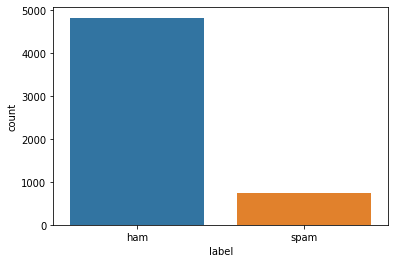

In [10]:
sns.countplot(x='label', data=df)

Hence we can see the imbalance between the count of occurences of ham and spam

In [17]:
def preprocessing(text):
  lemmatizer = WordNetLemmatizer()
  stemmer = PorterStemmer()

  stop_words = stopwords.words('english') + list(string.punctuation)

  filter_sentence = ''
  corpus = []

  # Regex based cleaning
  text = re.sub(r'[^\w\s]', '', text)

  # Tokenization
  words = nltk.word_tokenize(text)

  # Stopwords Removal
  words = [w for w in words if not w in stop_words]

  # Lemmatization and Lowercase
  filter_sentence = [filter_sentence + ' ' + str(stemmer.stem(word)).lower() for word in words]

  return filter_sentence

In [18]:
# Applying the preprocessing
df['text'].apply(preprocessing)

0       [ go,  jurong,  point,  crazi,  avail,  bugi, ...
1                      [ ok,  lar,  joke,  wif,  u,  oni]
2       [ free,  entri,  2,  wkli,  comp,  win,  fa,  ...
3       [ u,  dun,  say,  earli,  hor,  u,  c,  alread...
4       [ nah,  i,  dont,  think,  goe,  usf,  live,  ...
                              ...                        
5567    [ thi,  2nd,  time,  tri,  2,  contact,  u,  u...
5568         [ will,  ì_,  b,  go,  esplanad,  fr,  home]
5569                     [ piti,  mood,  soani,  suggest]
5570    [ the,  guy,  bitch,  i,  act,  like,  id,  in...
5571                           [ rofl,  it,  true,  name]
Name: text, Length: 5572, dtype: object

In [ ]:
corpus = df['text'].tolist()
# corpus

## Label Encoding


In [20]:
le = LabelEncoder()

df['label'] = le.fit_transform(df['label'])

## Train Test Split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.3, random_state = 42)
X_train.shape, y_test.shape

((3900,), (1672,))

## Count Vectorizer and tfidf Transform

In [22]:
cv = CountVectorizer() #max_features = 1500)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [24]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(X_train_cv)

<3900x7206 sparse matrix of type '<class 'numpy.float64'>'
	with 51569 stored elements in Compressed Sparse Row format>

# Modelling

### Multinomial NB

In [70]:
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

y_pred_nb = nb.predict(X_test_cv)

In [71]:
accuracy_score(y_test, y_pred_nb)

0.9820574162679426

In [72]:
confusion_matrix(y_test, y_pred_nb)

array([[1448,    5],
       [  25,  194]])

### Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

y_pred_lr = lr.predict(X_test_cv)

In [39]:
accuracy_score(y_test, y_pred_lr)

0.9778708133971292

In [40]:
confusion_matrix(y_test, y_pred_lr)

array([[1450,    3],
       [  34,  185]])

### SVC

In [41]:
svc = SVC()
svc.fit(X_train_cv, y_train)

y_pred_sv = svc.predict(X_test_cv)

In [42]:
accuracy_score(y_test, y_pred_sv)

0.9796650717703349

In [43]:
confusion_matrix(y_test, y_pred_sv)

array([[1453,    0],
       [  34,  185]])

### Logistsic Regression

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train_cv, y_train)

y_pred_dt = dt.predict(X_test_cv)

In [45]:
accuracy_score(y_test, y_pred_dt)

0.9617224880382775

In [46]:
confusion_matrix(y_test, y_pred_dt)

array([[1428,   25],
       [  39,  180]])

### KNeighbours Classification

In [47]:
kn = KNeighborsClassifier()
kn.fit(X_train_cv, y_train)

y_pred_kn = kn.predict(X_test_cv)

In [48]:
accuracy_score(y_test, y_pred_kn)

0.9192583732057417

In [49]:
confusion_matrix(y_test, y_pred_kn)

array([[1453,    0],
       [ 135,   84]])

### Random Forest Classifier

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

y_pred_rf = rf.predict(X_test_cv)

In [51]:
accuracy_score(y_test, y_pred_rf)

0.9772727272727273

In [52]:
confusion_matrix(y_test, y_pred_rf)

array([[1453,    0],
       [  38,  181]])

### AdaBoost Classifier

In [53]:
ada = AdaBoostClassifier()
ada.fit(X_train_cv, y_train)

y_pred_ada = ada.predict(X_test_cv)

In [54]:
accuracy_score(y_test, y_pred_ada)

0.9629186602870813

In [63]:
confusion_matrix(y_test, y_pred_ada)

array([[1444,    9],
       [  53,  166]])

### CatBoost Classifier

In [ ]:
cat = CatBoostClassifier()
cat.fit(X_train_cv, y_train)

y_pred_cat = cat.predict(X_test_cv)

In [62]:
accuracy_score(y_test, y_pred_cat)

0.9760765550239234

In [64]:
confusion_matrix(y_test, y_pred_cat)

array([[1452,    1],
       [  39,  180]])

### XGBoost Classifier

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train_cv, y_train)

y_pred_xgb = xgb.predict(X_test_cv)

In [68]:
accuracy_score(y_test, y_pred_xgb)

0.965311004784689

In [69]:
confusion_matrix(y_test, y_pred_xgb)

array([[1446,    7],
       [  51,  168]])